# Сборный проект №1

In [143]:
from io import BytesIO
import requests
import pandas as pd

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime
from scipy import stats as st

font_1 = {'family': 'sans-serif',
        'color':  '#000000',
        'weight': 'normal',
        'size': 20,
        }

font_2 = {'family': 'sans-serif',
        'color':  '#000000',
        'weight': 'normal',
        'size': 15,
        }

### Оглавление

+ [Описание проекта](#project_description)
+ [Описание данных](#data_description)
+ [Щаг 1. Загрузка данных](#task_1)
+ [Шаг 2. Подготовка данных](#task_2)
+ [Шаг 3. Проведите исследовательский анализ данных](#task_3)
+ [Шаг 4. Составьте портрет пользователя каждого региона](#task_4)
+ [Шаг 5. Проверьте гипотезы](#task_5)
+ [Шаг 6. Напишите общий вывод](#task_6)

## <a name="project_description"></a> Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## <a name="data_description"></a> Описание данных

- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

## <a name="tasl_1"></a> Шаг 1. Загрузка данных

In [144]:
spreadsheet_id = '1tqhYrM9TpydppHFTGCxj_eX6Xks3DGxpH4UbHDzte9w'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
data = pd.read_csv(BytesIO(r.content))
data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


## <a name="task_2"></a> Шаг 2. Подготовка данных

- Замените названия столбцов (приведите к нижнему регистру);
- Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
- Обработайте пропуски при необходимости:
  
    - Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
    - Опишите причины, которые могли привести к пропускам;
    - Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;
    
- Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

### Замена названий столбцов (приводим к нижнему регистру);

In [145]:
data.columns = map(str.lower, data.columns)
# data # проверка

### Преобразование данных в нужные типы. 
- Опишите, в каких столбцах заменили тип данных и почему;
- Обработайте пропуски при необходимости:
- Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
- Опишите причины, которые могли привести к пропускам;
- Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;


In [146]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В данных нужно произвести несколько замен.
1. привести "year_of_release" к дате
2. привести "user_score" к числу с плавающей запятой

#### Приводим "year_of_release" к дате

In [147]:
missing = data['year_of_release'].isna().sum()
total_data = data['year_of_release'].sum()
percent_of_nan = missing/total_data

print('Процент пропусков в столбце year_of_release:', percent_of_nan)

Процент пропусков в столбце year_of_release: 8.151849624375497e-06


Мы видим, что процент пропусков в столбце year_of_release очень мал. Мы можем просто удалить пропущенные значения и это не повредит нашим данным.

In [148]:
data['year_of_release'] = data['year_of_release'].dropna()
# data['year_of_release'].value_counts() #проверка что у нас больше нет nan

#### Приводим "user_score" к числу с плавающей запятой

In [149]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [150]:
#в данных присутствуют непонятные значения tbd, мы не можем точно поределить, что должно стоять на их месте, поэтому просто заменим их на nan
data.loc[data['user_score'] == 'tbd','user_score'] = np.nan

In [151]:
#безопаснее всего заполнять пропуски медианным значением, потому что это не навредит остальным данным
# заменим все пропуски в столбце "user_score" на значение, которое точно не может встретиться, чтобы потом мы просто могли его откинуть и при этом не потеряли статистику для всех остальных расчетов, где не нужны user_score
# data['user_score'] = data['user_score'].fillna(data['user_score'].median()) #старая замена
data['user_score'] = data['user_score'].fillna(-1) #новая замена

In [152]:
data['user_score'] = data['user_score'].astype('float')

In [153]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,-1.0,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,-1.0,NaN


### В остальных столбцах тоже есть пропуски.

In [154]:
# там где это возможно, заменим пропуски на медианы
# data['na_sales'] = data['na_sales'].fillna(data['na_sales'].median)
# data['eu_sales'] = data['eu_sales'].fillna(data['eu_sales'].median)
# data['jp_sales'] = data['jp_sales'].fillna(data['jp_sales'].median)
# data['other_sales'] = data['other_sales'].fillna(data['other_sales'].median)
# data['jp_sales'] = data['jp_sales'].fillna(data['jp_sales'].median)

# в остальных числовых данных, заменим пропуски на числа, которые не подходят по изначальные данные (не испортят их) и просто не будем учитывать эти данные дальше
data['critic_score'] = data['critic_score'].fillna(-1)

# заменим пропуски текстом там, где это нельзя сделать числом
data['rating'] = data['rating'].fillna('out of rating')
data['name'] = data['name'].fillna('no name game')

# приводим столбцы с текстом к нижнему регистру, чтобы избежать части дубликатов
data['name'] = data['name'].str.lower()
data['platform'] = data['platform'].str.lower()
data['genre'] = data['genre'].str.lower()
data['rating'] = data['rating'].str.lower()

data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8.0,e
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,-1.0,-1.0,out of rating
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,e
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8.0,e
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,-1.0,-1.0,out of rating
...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,ps3,2016.0,action,0.00,0.00,0.01,0.00,-1.0,-1.0,out of rating
16711,lma manager 2007,x360,2006.0,sports,0.00,0.01,0.00,0.00,-1.0,-1.0,out of rating
16712,haitaka no psychedelica,psv,2016.0,adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,out of rating
16713,spirits & spells,gba,2003.0,platform,0.01,0.00,0.00,0.00,-1.0,-1.0,out of rating


### Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [155]:
data['all_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8.0,e,82.54
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,-1.0,-1.0,out of rating,40.24
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,e,35.52
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8.0,e,32.77
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,-1.0,-1.0,out of rating,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,ps3,2016.0,action,0.00,0.00,0.01,0.00,-1.0,-1.0,out of rating,0.01
16711,lma manager 2007,x360,2006.0,sports,0.00,0.01,0.00,0.00,-1.0,-1.0,out of rating,0.01
16712,haitaka no psychedelica,psv,2016.0,adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,out of rating,0.01
16713,spirits & spells,gba,2003.0,platform,0.01,0.00,0.00,0.00,-1.0,-1.0,out of rating,0.01


### Проверим, есть ли дубликаты в названиях игр. 

In [156]:
data['name'].value_counts()
data['name'].duplicated().sum()

5155

Дубликаты в названиях игр есть, думаю, что это релизы разных годов или для разных платформ. Посмотрим игру с самым большим колличеством дубликатов:

In [157]:
data.query('name == "need for speed: most wanted"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
253,need for speed: most wanted,ps2,2005.0,racing,2.03,1.79,0.08,0.47,82.0,9.1,t,4.37
523,need for speed: most wanted,ps3,2012.0,racing,0.71,1.46,0.06,0.58,-1.0,-1.0,out of rating,2.81
1190,need for speed: most wanted,x360,2012.0,racing,0.62,0.78,0.01,0.15,83.0,8.5,t,1.56
1591,need for speed: most wanted,x360,2005.0,racing,1.00,0.13,0.02,0.10,83.0,8.5,t,1.25
1998,need for speed: most wanted,xb,2005.0,racing,0.53,0.46,0.00,0.05,83.0,8.8,t,1.04
2048,need for speed: most wanted,psv,2012.0,racing,0.33,0.45,0.01,0.22,-1.0,-1.0,out of rating,1.01
3581,need for speed: most wanted,gc,2005.0,racing,0.43,0.11,0.00,0.02,80.0,9.1,t,0.56
5972,need for speed: most wanted,pc,2005.0,racing,0.02,0.23,0.00,0.04,82.0,8.5,t,0.29
6273,need for speed: most wanted,wiiu,2013.0,racing,0.13,0.12,0.00,0.02,-1.0,-1.0,out of rating,0.27
6410,need for speed: most wanted,ds,2005.0,racing,0.24,0.01,0.00,0.02,45.0,6.1,e,0.27


Как мы видим, абсолютных дубликатов тут нет, либо год выпуска отличается, либо платформа.

Проверим дубликаты в платформах.

In [158]:
data['platform'].value_counts().sort_index()
data['platform'].duplicated().sum()

16684

Названия платформ часто повторяются, но дубликатов не видно, так что все хорошо.

## <a name="task_3"></a> Шаг 3. Проведите исследовательский анализ данных

- Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. 
- За какой характерный срок появляются новые и исчезают старые платформы?
- Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
Не учитывайте в работе данные за предыдущие годы.
- Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
- Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
- Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
- Соотнесите выводы с продажами игр на других платформах.
- Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?


### Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

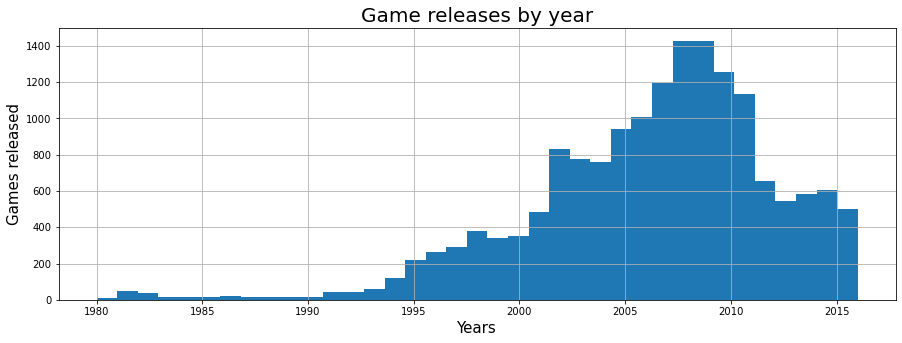

In [159]:
data.query('year_of_release>1900')['year_of_release'].hist(
    figsize = (15, 5),
    bins = data['year_of_release'].value_counts().count()
);

plt.title('Game releases by year', fontdict=font_1);
plt.xlabel('Years', fontdict=font_2);
plt.ylabel('Games released', fontdict=font_2);

# data.query('year_of_release>1900')['year_of_release'].describe()

Данных за период до 1993 года очень мало, но мне кажется, что в данном случае все данные можно оставить, потому что будет интересно изучить, что происходило с рынком игр на самом его зарождении.

### Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам.

In [160]:
data.pivot_table(
    index = 'platform', values = 'all_sales', aggfunc = 'sum'
).sort_values(
    by = 'all_sales', ascending=False
)

,all_sales
platform,
ps2,1255.77
x360,971.42
ps3,939.65
wii,907.51
ds,806.12
ps,730.86
gba,317.85
ps4,314.14
psp,294.05


Возьмем отсюда платформы, которые имеют продажи боллее 200 млн копий и построим гистограмму для них

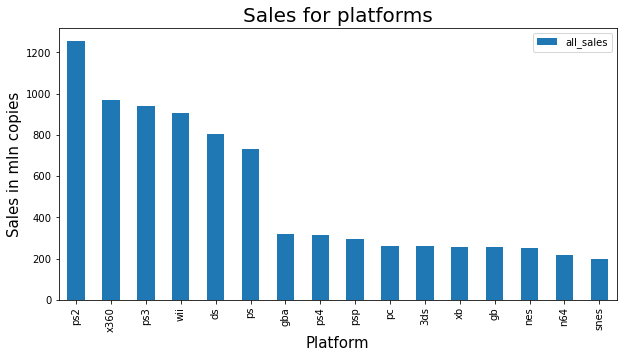

In [161]:
test_1 = data.pivot_table(
    index = 'platform', values = 'all_sales', aggfunc = 'sum'
).sort_values(
    by = 'all_sales', ascending=False
);

test_1.query('all_sales>200').plot(kind='bar', figsize = (10, 5));

plt.title('Sales for platforms', fontdict=font_1);
plt.xlabel('Platform', fontdict=font_2);
plt.ylabel('Sales in mln copies', fontdict=font_2);


Как мы видим по графику, в индутрии есть несколько лидирующих платформ, у которых продажи гораздо выше, чем у остальных. Сильнее всех выделяется PS2 с явням преимуществом над всеми остальными платформами. После шестерки лидеров сумма продаж у остальных платформ отличается не так сильно.

### За какой характерный срок появляются новые и исчезают старые платформы?

Нужно для каждой платформы посмотреть дату первого и последнего релиза

top_platforms = 'ps2', 'x360', 'ps3', 'wii', 'ds', 'ps'

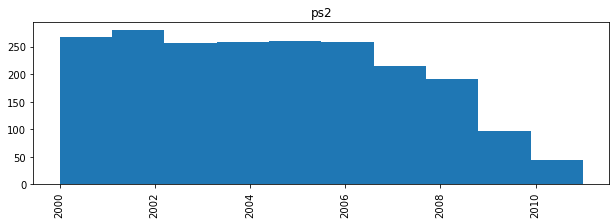

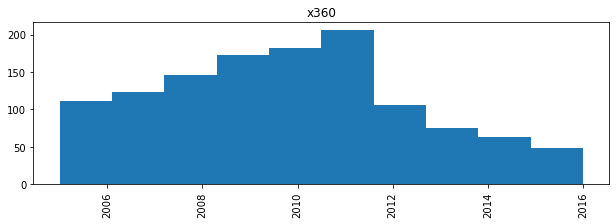

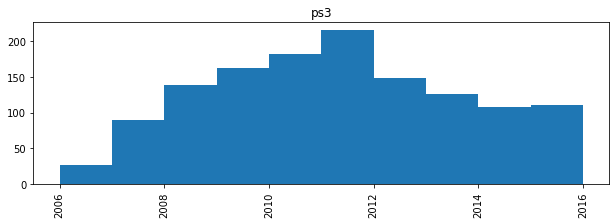

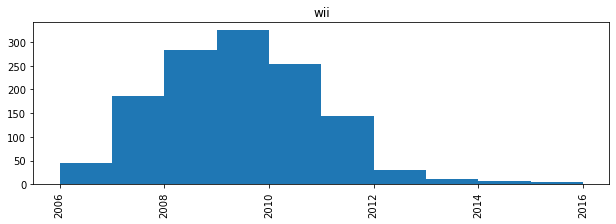

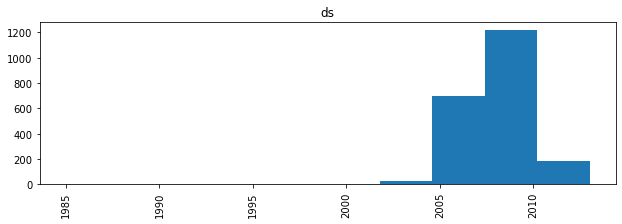

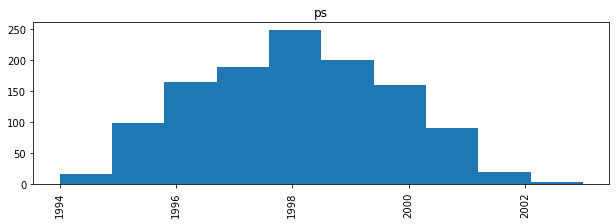

In [162]:
# data.query('year_of_release>1900')['year_of_release'].hist(data['platform'], figsize=(15, 20));

data.loc[data['platform'] == 'ps2' ].query('year_of_release>1900')['year_of_release'].hist(
    data['platform'], 
    figsize=(10, 3)
);

data.loc[data['platform'] == 'x360'].query('year_of_release>1900')['year_of_release'].hist(
    data['platform'], 
    figsize=(10, 3)
);

data.loc[data['platform'] == 'ps3'].query('year_of_release>1900')['year_of_release'].hist(
    data['platform'], 
    figsize=(10, 3)
);

data.loc[data['platform'] == 'wii'].query('year_of_release>1900')['year_of_release'].hist(
    data['platform'], 
    figsize=(10, 3)
);

data.loc[data['platform'] == 'ds'].query('year_of_release>1900')['year_of_release'].hist(
    data['platform'], 
    figsize=(10, 3)
);

data.loc[data['platform'] == 'ps'].query('year_of_release>1900')['year_of_release'].hist(
    data['platform'], 
    figsize=(10, 3)
);

По гистограммам мы видим, что в основном компании держатся на пике продаж 2-5 лет и только ps2 показывает отличные результаты продаж на протяжении 8-10 лет.

### Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

Нам нужно построить прогноз на 2017 год, соответственно нужно изучить данные за предыдущий актуальный период. Для большей точности данных, возьмем период с 2013 (5 лет до прогнозного года).

### Не учитывайте в работе данные за предыдущие годы. Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

In [163]:
data.query('year_of_release>2013').pivot_table(
    index = 'platform', values = 'all_sales', aggfunc = 'sum'
).sort_values(
    by = 'all_sales', ascending=False
)

,all_sales
platform,
ps4,288.15
xone,140.36
3ds,86.68
ps3,68.18
x360,48.22
wiiu,42.98
pc,27.05
psv,22.40
wii,5.07


In [164]:
data.query('year_of_release>2013').pivot_table(
    index = 'year_of_release', columns = 'platform', values = 'all_sales'
).sort_values(
    by = 'year_of_release', ascending=False
)


platform,3ds,pc,ps3,ps4,psp,psv,wii,wiiu,x360,xone
year_of_release,,,,,,,,,,
2016.0,0.329130,0.097222,0.094737,0.422256,NaN,0.050000,0.180,0.328571,0.116923,0.300575
2015.0,0.323023,0.170400,0.230411,0.867883,0.040,0.056818,0.285,0.583929,0.341714,0.751750
2014.0,0.547000,0.282553,0.442222,1.333333,0.024,0.119000,0.625,0.710645,0.551429,0.886393


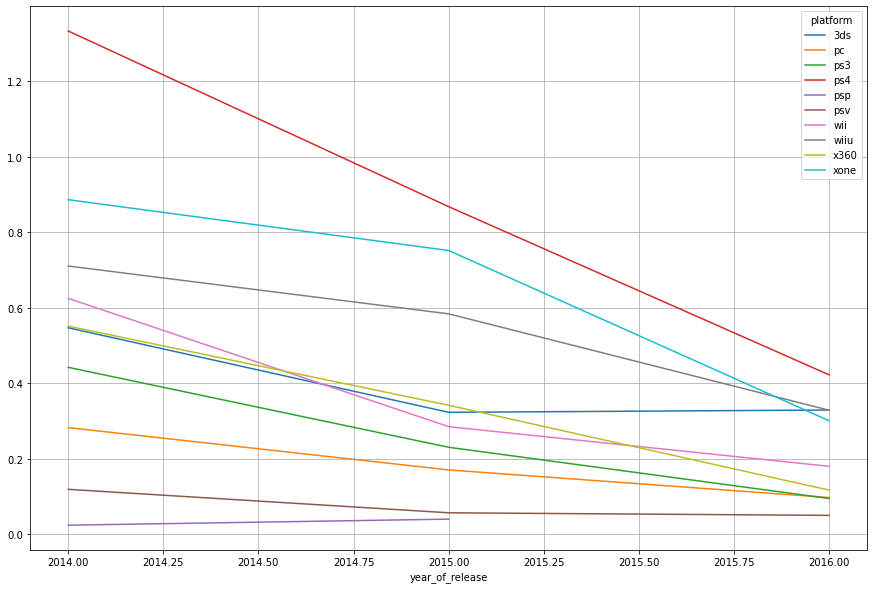

In [165]:
data.query('year_of_release>2013').pivot_table(
    index = 'year_of_release', columns = 'platform', values = 'all_sales'
).sort_values(
    by = 'year_of_release', ascending=False
).plot(figsize = (15,10), grid = True);


Из данных мы видим, что компании "ps4", "ps5" и "3ds" лидируют по продажам за 3 года. В конце выбранного периода у всех компаний продажи сильно сокращаются, некоторые компании и вовсе перестали показывать результаты по продажам после 2015 года (например 'psp').

### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

In [166]:
data_2013 = data.query('year_of_release>2013')
# data_2013

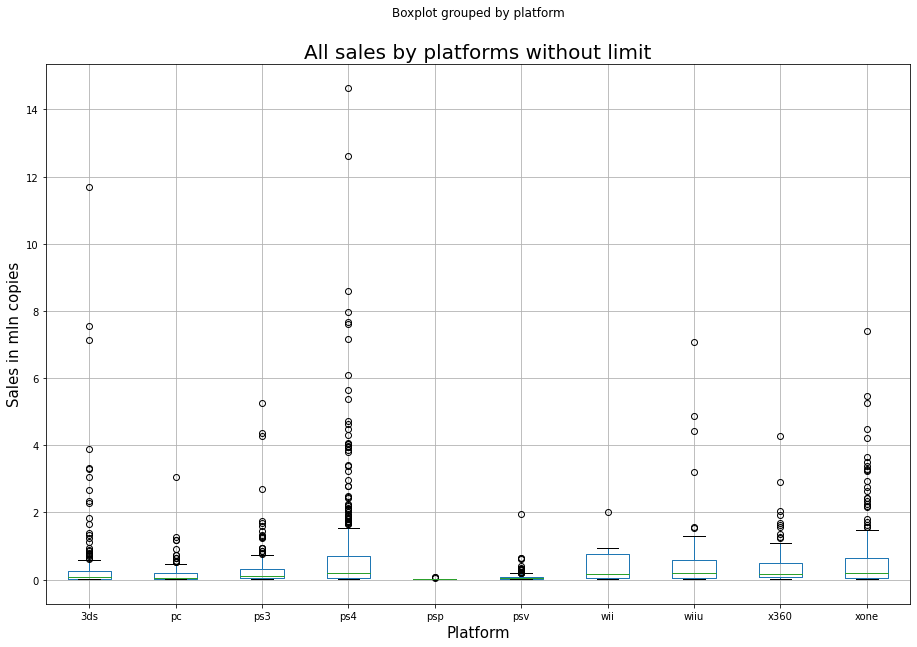

In [167]:
data_2013.boxplot('all_sales', by = 'platform', figsize = (15,10))

plt.title('All sales by platforms without limit', fontdict=font_1);
plt.xlabel('Platform', fontdict=font_2);
plt.ylabel('Sales in mln copies', fontdict=font_2);


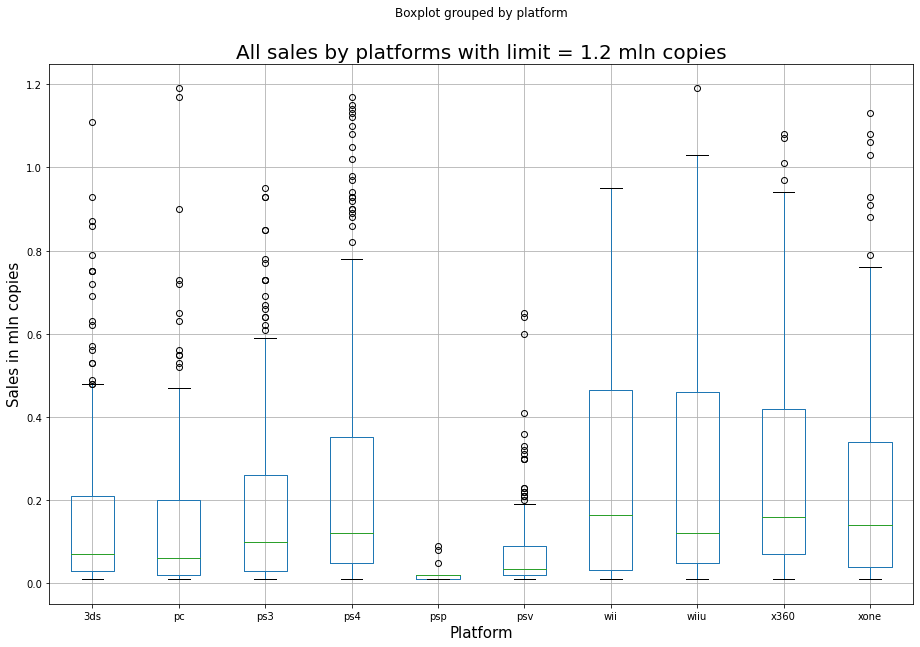

In [168]:
data_2013.query('all_sales<1.2').boxplot('all_sales', by = 'platform', figsize = (15,10))

plt.title('All sales by platforms with limit = 1.2 mln copies', fontdict=font_1);
plt.xlabel('Platform', fontdict=font_2);
plt.ylabel('Sales in mln copies', fontdict=font_2);

Как мы видим, практически у всех платформ есть сильные выбросы в продажах, это значит, что платформа выпустила одну или пару очень успешных игр, но продажи всех остальных игр платформы сильно ниже  этих успешных игр.

### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

Возьмем для анализа одну из самых популярных и прибыльных платформ "ps4"

<AxesSubplot:xlabel='user_score'>

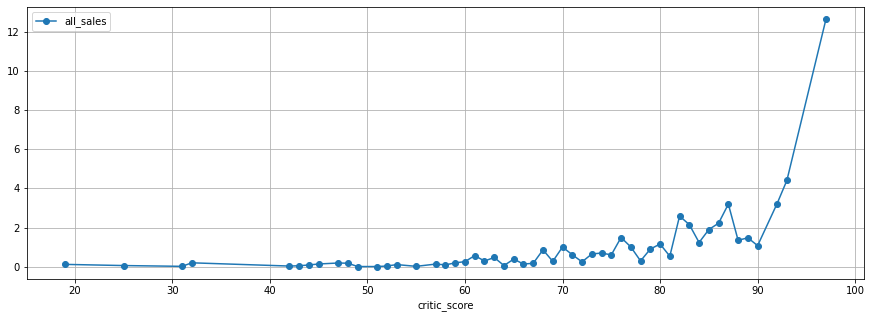

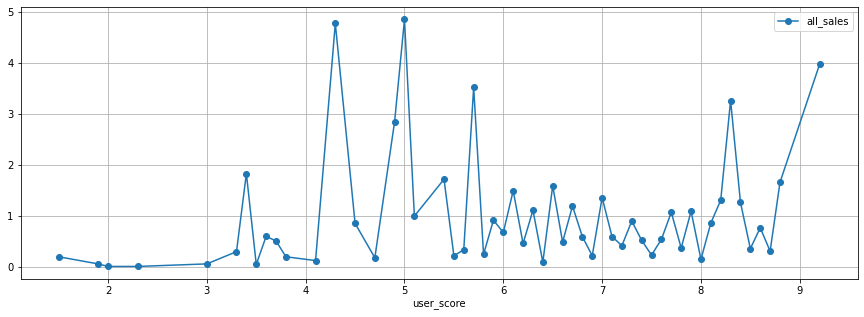

In [169]:
data.query(
    'critic_score > 0'
).query(
    'year_of_release > 2013'
).query(
    "platform == 'ps4'"
).pivot_table(
    index = ['critic_score'], values = 'all_sales'
).plot(style = 'o-', figsize = (15,5), grid = True)


data.query(
    'user_score > 0'
).query(
    'year_of_release > 2013'
).query(
    "platform == 'ps4'"
).pivot_table(
    index = ['user_score'], values = 'all_sales'
).plot(style = 'o-', figsize = (15,5), grid = True)


# data.query(
#     'year_of_release > 2006'
# ).query(
#     "platform == 'x360'"
# ).pivot_table(
#     index = 'year_of_release', values = 'all_sales', columns = 'critic_score'
# )

Как мы видим из этих двух графиков, оценка критиков сильнее влияет на продажи, чем оценка пользователей. При увеличении оценки критиков, продажи начинают сильно расти, при этом при таком же увеличении оценки пользователей, продажи растут незначительно, а самые большие продажи вообще имеют среднюю пользовательскую оценку.

### Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

Готовим данные:

In [170]:
data_ps4 = data_2013.query('platform =="ps4"').query('critic_score > -1').query('user_score > -1')
# data_ps4
advanced_data_ps4 = data_ps4.loc[:, ['all_sales', 'critic_score', 'user_score']]
advanced_data_ps4.head()

,all_sales,critic_score,user_score
42,12.62,97.0,8.3
77,8.58,82.0,4.3
92,7.66,83.0,5.7
94,7.60,85.0,5.0
105,7.17,87.0,6.5


Строим таблицу для корреляций:

In [171]:
advanced_data_ps4.corr()

,all_sales,critic_score,user_score
all_sales,1.000000,0.401903,-0.043186
critic_score,0.401903,1.000000,0.546434
user_score,-0.043186,0.546434,1.000000


График:

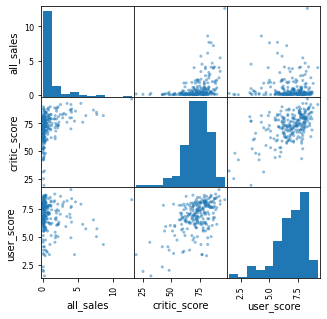

In [172]:
pd.plotting.scatter_matrix(advanced_data_ps4, figsize=(5, 5));

**Вывод:**


Продажи имеют большую корреляцию с оценкой критиков, чем с оценкой пользователей, соответственно хорошая оценка критиков важнее для успешных продаж игры.

При этом мы видим, что оценка пользователей имеет достаточно большую корреляцию с оценкой критиков, соответственно если у игры хорошие оценки среди критиков, скорее всего у пользоватей она тоже получает высокую оценку.



### Соотнесите выводы с продажами игр на других платформах.

In [173]:
data_2013_adv = data_2013.query('critic_score > -1').query('user_score > -1')
# data_2013_adv

Снова посмотрим самые успешные по продажам плтаформы с обновленными параметрами по оценкам и лимиту по году.

In [174]:
data_2013_adv.pivot_table(
    index = 'platform', values = 'all_sales'
).sort_values(by='all_sales', ascending = False)

,all_sales
platform,
ps4,0.936752
wiiu,0.805476
xone,0.763510
3ds,0.515106
x360,0.388462
ps3,0.315556
pc,0.207043
psv,0.149434


**Для ps4:**

In [175]:
data_ps4 = data_2013_adv.query('platform =="ps4"')

advanced_data_ps4 = data_ps4.loc[:, ['all_sales', 'critic_score', 'user_score']]
advanced_data_ps4.head()
advanced_data_ps4.corr()


,all_sales,critic_score,user_score
all_sales,1.000000,0.401903,-0.043186
critic_score,0.401903,1.000000,0.546434
user_score,-0.043186,0.546434,1.000000


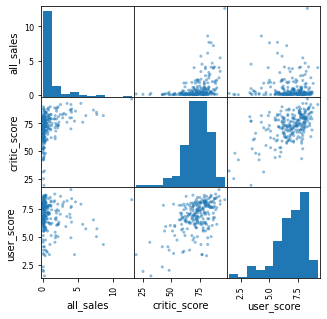

In [176]:
pd.plotting.scatter_matrix(advanced_data_ps4, figsize=(5, 5));

**Для wiiu:**

In [177]:
data_wiiu = data_2013_adv.query('platform =="wiiu"')

advanced_data_wiiu = data_wiiu.loc[:, ['all_sales', 'critic_score', 'user_score']]
advanced_data_wiiu.head()
advanced_data_wiiu.corr()


,all_sales,critic_score,user_score
all_sales,1.000000,0.375640,0.411451
critic_score,0.375640,1.000000,0.763536
user_score,0.411451,0.763536,1.000000


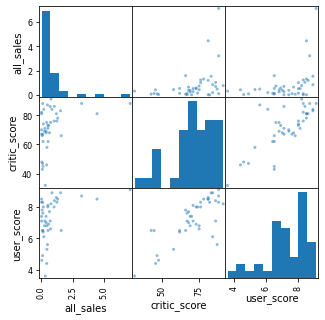

In [178]:
pd.plotting.scatter_matrix(advanced_data_wiiu, figsize=(5, 5));

**Для xone:**

In [179]:
data_xone = data_2013_adv.query('platform =="xone"')

advanced_data_xone = data_xone.loc[:, ['all_sales', 'critic_score', 'user_score']]
advanced_data_xone.head()
advanced_data_xone.corr()


,all_sales,critic_score,user_score
all_sales,1.000000,0.422112,-0.091734
critic_score,0.422112,1.000000,0.440977
user_score,-0.091734,0.440977,1.000000


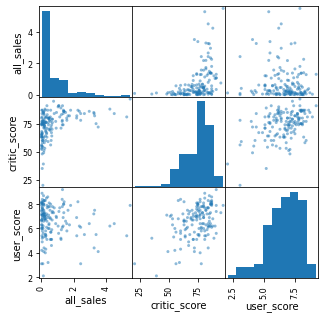

In [180]:
pd.plotting.scatter_matrix(advanced_data_xone, figsize=(5, 5));

**Для 3ds:**

In [181]:
data_3ds = data_2013_adv.query('platform =="3ds"')

advanced_data_3ds = data_3ds.loc[:, ['all_sales', 'critic_score', 'user_score']]
advanced_data_3ds.head()
advanced_data_3ds.corr()


,all_sales,critic_score,user_score
all_sales,1.000000,0.284686,0.279850
critic_score,0.284686,1.000000,0.862485
user_score,0.279850,0.862485,1.000000


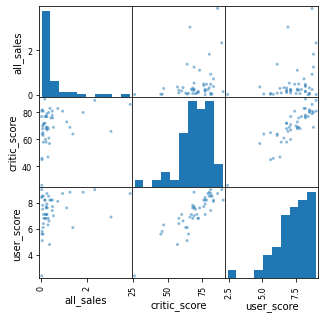

In [182]:
pd.plotting.scatter_matrix(advanced_data_3ds, figsize=(5, 5));

**Для x360:**

In [183]:
data_x360 = data_2013_adv.query('platform =="x360"')

advanced_data_x360 = data_x360.loc[:, ['all_sales', 'critic_score', 'user_score']]
advanced_data_x360.head()
advanced_data_x360.corr()


,all_sales,critic_score,user_score
all_sales,1.000000,0.525723,0.336514
critic_score,0.525723,1.000000,0.625309
user_score,0.336514,0.625309,1.000000


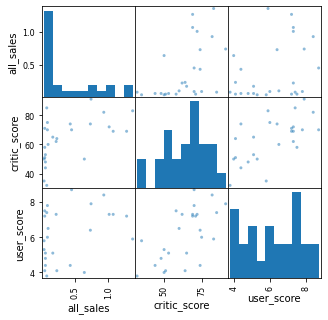

In [184]:
pd.plotting.scatter_matrix(advanced_data_x360, figsize=(5, 5));

**Вывод**

У PS4 мы видим небольшую отрицательную корреляцию продаж с отзывами пользователей, это означает, что чем лучше отзывы, тем меньше продаж, при этом с отзывами критиков мы можем наблюдать сильную положительную корреляцию.

У платформы WIIU мы видим большую зависимость продаж от отзывов пользователей, чем от отзывов критиков, хотя разница в их корреляциях не очень большая. Так же у WIIU отзывы критиков достаточно сильно коррелируют с отзывами пользователей.

У XONE ситуация очень похожа на ситуацию с PS4. Мы так же видим маленькую отрицательную корреляцию продаж и отзывов пользователей и среднюю корреляцию продаж и оценок пользователей.

У платформы 3DS корреляции продаж и отзывов пользователей и продаж, и отзывов критиков практически равны, а также корреляция отзывов пользователей и критиков очень большая. При этом все эти отзывы положительно коррелируют с продажами.

У платформы X360 тоже положительная корреляция и у отзывов критиков с продажами и у отзывов пользователей с продажами, но пользователи меньше влияют на продажи так как там корреляция меньше.

### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [185]:
data.query(
    'year_of_release > 2013'
).pivot_table(
    index = ['genre'], values = 'all_sales', aggfunc = 'sum'
).sort_values(
    by = 'all_sales', ascending = True)

,all_sales
genre,
puzzle,2.21
strategy,3.96
simulation,13.13
adventure,17.55
platform,18.09
racing,27.52
fighting,28.22
misc,37.55
role-playing,101.44


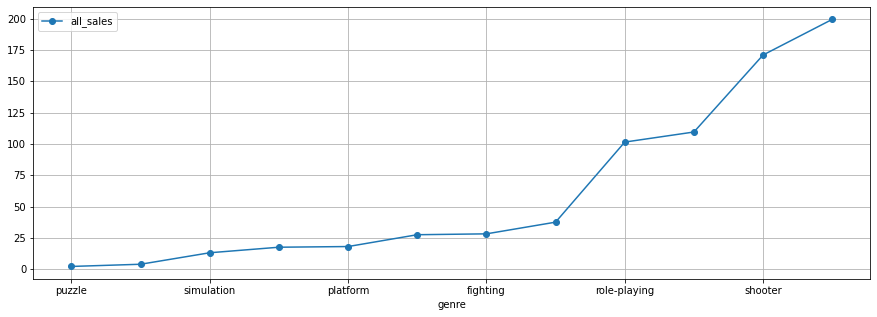

In [186]:
data.query(
    'year_of_release > 2013'
).pivot_table(
    index = ['genre'], values = 'all_sales', aggfunc = 'sum'
).sort_values(
    by = 'all_sales', ascending = True
).plot(
    style = 'o-', figsize = (15,5), grid = True);

Мы посчитали сумму продаж с 2013 года по всем жанрам и отсортировали в порядке возрастания. Как мы видим из таблицы и из графика самым прибыльным жанром является action, на втором месте идут шутеры и на третьем - спортивные игры. Самыми менее прибыльными жанрами являются пазлы и стратегии.

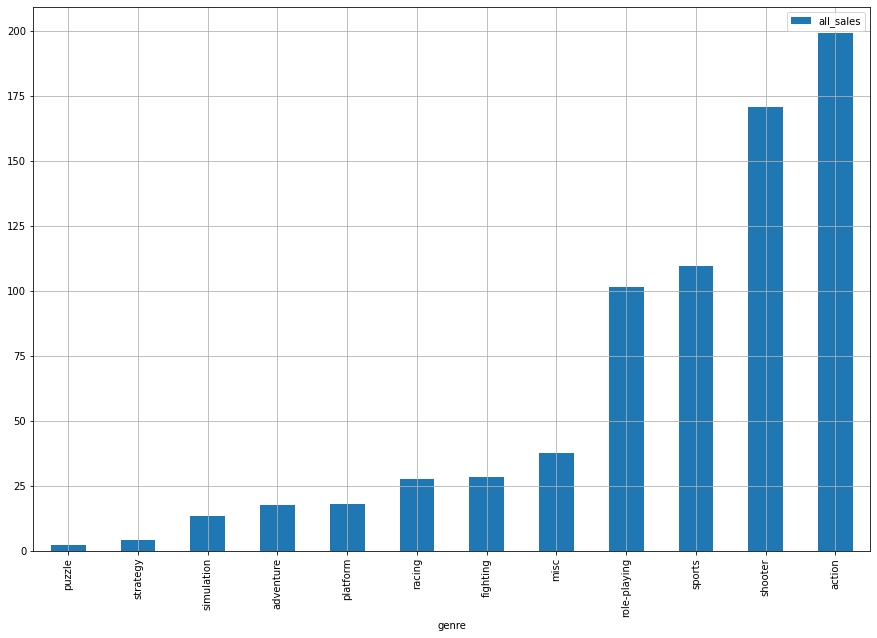

In [187]:
data.query(
    'year_of_release > 2013'
).pivot_table(
    index = ['genre'], values = 'all_sales', aggfunc = 'sum'
).sort_values(
    by = 'all_sales', ascending = True
).plot(kind = 'bar', figsize = (15,10), grid = True);

ЗАМЕТКА: мне кажется что вот так на прямую считать сумму продаж по жанрам неправильно. Скорее всего игр с жанром action выпускается гораздо больше, чем стратегий и поэтому они берут колличеством. Скорее нужно посчитать что-то типо средней продаж по каждому из жанров

In [188]:
test_2 = data.query(
    'year_of_release > 2013'
).pivot_table(
    index = ['genre'], values = 'all_sales', aggfunc = 'count'
).sort_values(
    by = 'all_sales', ascending = True)

In [189]:
test_3 = data.query(
    'year_of_release > 2013'
).pivot_table(
    index = ['genre'], values = 'all_sales', aggfunc = 'sum'
).sort_values(
    by = 'all_sales', ascending = True)

In [190]:
test_4 = test_3 / test_2
test_4.sort_values(by = 'all_sales', ascending = False)

,all_sales
genre,
shooter,1.335469
sports,0.680000
platform,0.476053
fighting,0.470333
role-playing,0.459005
racing,0.398841
misc,0.332301
action,0.322068
simulation,0.298409


Здесь я разделил общее колличество продаж на колличество выпущенных игр в каждом жанре. Получается, что шутеры - самые прибыльные на одну игру, а игры путешествия - самые менее прибыльные.

## <a name="task_4"></a> Шаг 4. Составьте портрет пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

### Самые популярные платформы (топ-5). Опишите различия в долях продаж.

**Для na_sales**

In [191]:
data_na_sales = data.query(
    'year_of_release > 2013'
).pivot_table(
    index = ['platform'], values = ['na_sales'], aggfunc = 'sum'
).sort_values(by = 'na_sales', ascending = False).head()

data_na_sales

,na_sales
platform,
ps4,98.61
xone,81.27
x360,28.30
3ds,22.64
ps3,22.05


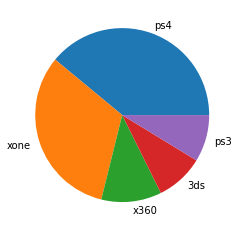

In [192]:
plt.pie(data_na_sales['na_sales'], labels = ['ps4', 'xone', 'x360', '3ds', 'ps3']);

**Для eu_sales**

In [193]:
data_eu_sales = data.query(
    'year_of_release > 2013'
).pivot_table(
    index = ['platform'], values = ['eu_sales'], aggfunc = 'sum'
).sort_values(by = 'eu_sales', ascending = False).head()

data_eu_sales

,eu_sales
platform,
ps4,130.04
xone,46.25
ps3,25.54
pc,17.97
3ds,16.12


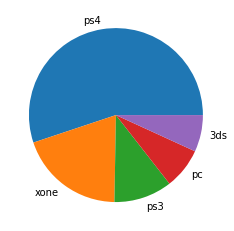

In [194]:
plt.pie(data_eu_sales['eu_sales'], labels = ['ps4', 'xone', 'ps3', 'pc', '3ds']);


**Для jp_sales**

In [195]:
data_jp_sales = data.query(
    'year_of_release > 2013'
).pivot_table(
    index = ['platform'], values = ['jp_sales'], aggfunc = 'sum'
).sort_values(by = 'jp_sales', ascending = False).head()

data_jp_sales

,jp_sales
platform,
3ds,44.24
ps4,15.02
psv,14.54
ps3,11.22
wiiu,7.31


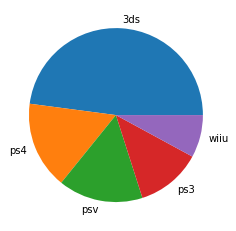

In [196]:
plt.pie(data_jp_sales['jp_sales'], labels = ['3ds', 'ps4', 'psv', 'ps3', 'wiiu']);

**Вывод:**

Как мы видим, для Америки и Европы популярные платформы почти одни и те же и в обоих регионах доминирует ps4. 

В Японии рынок другой. Тут доминирует 3ds, а платформы, которые лидировали в Европе и Америке занимают более низкие позиции.

### Самые популярные жанры (топ-5). Поясните разницу.

**Для na_sales**

In [197]:
data_genre_na = data.query(
    'year_of_release > 2013'
).pivot_table(
    index = ['genre'], values = ['na_sales'], aggfunc = 'sum'
).sort_values(by = 'na_sales', ascending = False).head()

data_genre_na

,na_sales
genre,
shooter,79.02
action,72.53
sports,46.13
role-playing,33.47
misc,15.05


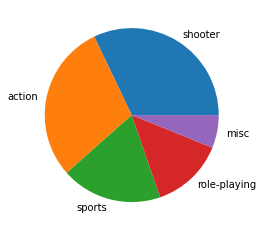

In [198]:
plt.pie(data_genre_na['na_sales'], labels = ['shooter', 'action', 'sports', 'role-playing', 'misc']);

**Для eu_sales**

In [199]:
data_genre_eu = data.query(
    'year_of_release > 2013'
).pivot_table(
    index = ['genre'], values = ['eu_sales'], aggfunc = 'sum'
).sort_values(by = 'eu_sales', ascending = False).head()

data_genre_eu

,eu_sales
genre,
action,74.68
shooter,65.52
sports,45.73
role-playing,28.17
racing,14.13


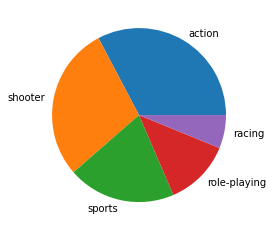

In [200]:
plt.pie(data_genre_eu['eu_sales'], labels = ['action', 'shooter', 'sports', 'role-playing', 'racing']);

**Для jp_sales**

In [201]:
data_genre_jp = data.query(
    'year_of_release > 2013'
).pivot_table(
    index = ['genre'], values = ['jp_sales'], aggfunc = 'sum'
).sort_values(by = 'jp_sales', ascending = False).head()

data_genre_jp

,jp_sales
genre,
role-playing,31.16
action,29.58
fighting,6.37
misc,5.61
shooter,4.87


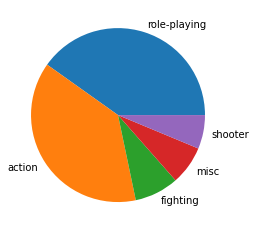

In [202]:
plt.pie(data_genre_jp['jp_sales'], labels = ['role-playing', 'action', 'fighting', 'misc', 'shooter']);

**Вывод:**

Опять же, в Европе и Америке популярные жанры игр не различаются. В обоих регионах домируют шутеры и экшн игры. В Японии на первом месте находятся ролевые компьютерные игры, а шутеры, которые так популярны в Америке, занимают лишь 5ое место.

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

**Продажи по рейтингу в NA:**

In [203]:
ESRB_sales_na = data.query(
    'year_of_release > 2013'
).pivot_table(
    index = ['rating'], values = ['na_sales'], aggfunc = 'sum'
).sort_values(by = 'na_sales', ascending = False)

ESRB_sales_na

,na_sales
rating,
m,96.42
out of rating,64.72
e,50.74
t,38.95
e10+,33.23


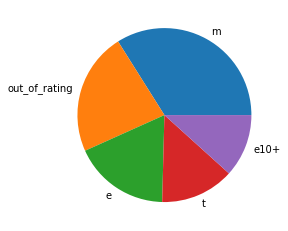

In [204]:
plt.pie(ESRB_sales_na['na_sales'], labels = ['m', 'out_of_rating', 'e', 't', 'e10+']);

**Продажи по рейтингу в EU:**

In [205]:
ESRB_sales_eu = data.query(
    'year_of_release > 2013'
).pivot_table(
    index = ['rating'], values = ['eu_sales'], aggfunc = 'sum'
).sort_values(by = 'eu_sales', ascending = False)

ESRB_sales_eu

,eu_sales
rating,
m,93.44
out of rating,58.95
e,58.06
t,34.07
e10+,26.16


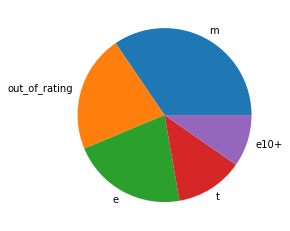

In [206]:
plt.pie(ESRB_sales_eu['eu_sales'], labels = ['m', 'out_of_rating', 'e', 't', 'e10+']);

**Продажи по рейтингу в JP:**

In [207]:
ESRB_sales_jp = data.query(
    'year_of_release > 2013'
).pivot_table(
    index = ['rating'], values = ['jp_sales'], aggfunc = 'sum'
).sort_values(by = 'jp_sales', ascending = False)

ESRB_sales_jp

,jp_sales
rating,
out of rating,56.90
t,14.78
e,8.94
m,8.01
e10+,4.46


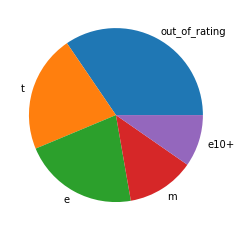

In [208]:
plt.pie(ESRB_sales_eu['eu_sales'], labels = ['out_of_rating', 't', 'e', 'm', 'e10+']);

Опираясь на сайт ESRB данные сокращения означают:
- e - everyone
- m - mature (17+)
- t - teen (13 to 17)
- e10+ - 10 and above
- ec - early childhood
- rp - rating pending

**Вывод:**

В Америке и Европе самыми продаваемыми являются игры с рейтингом 'm', либо игры не имеющие рейтинга. В Японии больше всего игр без рейтинга, а на втором месте игры для подростков (13-17 лет).

## <a name="task_5"></a> Шаг 5. Проверьте гипотезы

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Задайте самостоятельно пороговое значение alpha.

Поясните:
- Как вы сформулировали нулевую и альтернативную гипотезы;
- Какой критерий применили для проверки гипотез и почему.

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Будем использовать t-критерий Стьюдента, так как сравниваемые выборки независимы между собой.

#### Гипотезы:
- H0: средний пользовательский рейтинг платформ Xbox On и PC одинаковый
- H1: средний пользовательский рейтинг платформ Xbox One и PC различается

In [209]:
alpha = 0.05

xbox_one = data.query(
    'year_of_release > 2013'
)['user_score'].loc[data['platform'] == 'xone']
pc = data.query(
    'year_of_release > 2013'
)['user_score'].loc[data['platform'] == 'pc']


In [210]:
results = st.ttest_ind(xbox_one, pc, equal_var=False)

In [211]:
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.26246011727057733
Не получилось отвергнуть нулевую гипотезу


### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

#### Гипотезы:
- H0: средний пользовательский рейтинг жанров Action и Sports одинаковый
- H1: средний пользовательский рейтинг жанров Action и Sports различается

In [212]:
action = data.query(
    'year_of_release > 2013'
)['user_score'].loc[data['genre'] == 'action']
sports = data.query(
    'year_of_release > 2013'
)['user_score'].loc[data['genre'] == 'sports']

In [213]:
results = st.ttest_ind(action, sports, equal_var=False)

In [214]:
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.829371809684136e-05
Отвергаем нулевую гипотезу


## <a name="task_6"></a> Шаг 6. Напишите общий вывод

**В ходе работы над проектом было выполнено:**
1.	Просмотрена таблица, выявлены аномалии и пропущенные значения.
2.	Проведена предобработка таблицы: замена столбцов, заполнение пропусков, удаление дубликатов и т.д.
3.	Подготовлены актуальные данные и проведен исследовательский анализ данных.
4.	Составлены портреты пользователей для купных регионов продаж.
5.	Выполнены проверки гипотез.

**Продажи компьютерных игр зависят от трех основных составляющих: кто игру создал, на какой платформе она сделана и какого она жанра.**

-	Лидерами на рынке сейчас являются компании, которые уже имеют большой опыт в разработке игр и занимаются этим уже не первое десятилетие, меняя только платформы с развитием технологического прогресса.

- 	Платформа определяет технические возможности разработчиков. Здесь есть прямая зависимость: лучше платформа значит можно сделать игру лучше. Жизненный цикл в 5-12 лет обусловлен скачками в технологиях процессора, оперативной и видеопамяти.

- 	Жанр - это то, что выбирает игрок. Каждый человек уникален, и не каждому игроку будет по душе одновременно стратегия и шутеры. Соответственно студии-разработчики и издатели боряться за целевую аудиторию своего продукта.

**Сводный анализ для кампании на 2017 год.**
1.	Для начала– сфокусировать на разработке игры для нескольких самых популярных платформ – ps4, xone и 3ds. Потом можно добавить и другие платформы, но перенос игры на новую платформу требует дополнительных затрат, поэтому в начале надо фокусироваться на самых популярных вариантах.
2.	В первую очередь сфокусироваться на разработке игр популярных жанров - экшен, шутеры, спортивные и ролевые игры.
3.	Производить анализ своей аудитории. Сегодня большинство игр рассчитано на игроков, которым 17 лет и старше.
4.	Не забывать распространять компьютерные игры и портации игр с популярных платформ на PC. Компьютер еще долго не выйдет из конкуренции за игроков.

